In [2]:
from bs4 import BeautifulSoup
from urllib import request
import json
from collections import OrderedDict
import datetime
import requests
import matplotlib as mpl
# mpl.use('AGG')
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.font_manager import FontProperties
fp = FontProperties(fname='C:\WINDOWS\Fonts\YuGothL.ttc', size=14)
# My module
from store import Crawling

In [3]:
def isFloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False

def loadJson(key):
    with open(f"./JsonData/{key}_data.json", "r", encoding="utf-8") as f:
        return json.load(f)[key]

def saveJson(list, key: str):
    dict = {key:list}
    with open(f"./JsonData/{key}_data.json", "w", encoding="utf-8") as f:
        json.dump(dict, f, indent='\t', default=dateTimeSirialize)

def dateTimeSirialize(obj: datetime.datetime):
    if isinstance(obj, datetime.datetime):
        return obj.isoformat()
    raise TypeError(repr(obj) + " is not JSON serializable")

def createData(key :str):
    maxPageNum = countHTMLFile(key, f"./{str.capitalize(key)}HTML")
    dataList = []
    for j in range(maxPageNum + 1):
        pageName = f"./HTML/sapporo No.{j}.html"
        print(f"{pageName}の処理を開始しました。")
        html = loadHTML(pageName)
        soup = BeautifulSoup(html, "lxml")
        tb = soupToTable(soup)
        for i in range(getDayRange(soup)):
            day = str(i + 1)
            maxtmp = tb.getElement(day, "MAX_TEMP")
            mintmp = tb.getElement(day, "MIN_TEMP")
            date = getDateFromSoup(soup) + day
            wt = [toDateTime(date), maxtmp, mintmp]
            dataList.append(wt)
        print(f"処理が終了しました: {pageName}")
    print("========complete========")
    return dataList

def countHTMLFile(keyFileName, dirName):
    import os, fnmatch
    fileList = os.listdir(f"{dirName}")
    fileNum = fnmatch.filter(fileList, f"{keyFileName}*.html")
    return fileNum

def soupToTable(soup: BeautifulSoup):
    tb = Table(getElementList(soup, "day"))
    tb.addRow(getElementList(soup, "maxtemp"), "MAX_TEMP")
    tb.addRow(getElementList(soup, "mintemp"), "MIN_TEMP")
    return tb
    
def getDateFromSoup(soup: BeautifulSoup) -> str:
    return soup.find("h2").text

def toDateTime(dateStr: str) -> datetime:
    dateDt = datetime.datetime.strptime(dateStr, '%Y年%m月%d')
    return dateDt

def getElementList(soup: BeautifulSoup, dataType="maxtemp"):
    if dataType == "day":
        tags = soup.findAll("td", {"class":"day"})
        list = []
        for tag in tags:
            list.append(tag.text)
        return list
    elif dataType == "mintemp":
        return [tag.text for tag in soup.findAll("span", {"class":"blue"})]
    elif dataType == "maxtemp":
        return [tag.text for tag in soup.findAll("span", {"class":"red"})]

def getDayRange(soup: BeautifulSoup) -> int:
    tags = soup.findAll("td",{"class":"day"})
    list = []
    for tag in tags:
        if tag.text.isdecimal():
            list.append(int(tag.text))
    return max(list)

def loadHTML(path: str):
    html = ""
    with open(path, "r", encoding="UTF-8") as f:
        html = f.read()
    return html

def getSoup(URL):
    response = request.urlopen(URL)
    soup = BeautifulSoup(response, "lxml")
    return soup

class Table:
    def __init__(self, nameList):
        self.__culumNameList = nameList
        self.__rowDict = {}
        self.__title = None

    def setTitle(self, title):
        self.__title = title

    def getTitle(self):
        if self.__title is None:
            self.__title = "None Title"
            return self.__title
        return self.__title

    def addRow(self, row, rowName: str):
        if rowName in self.__rowDict:
            print("Failed add a row to a table")
            return
        self.__rowDict[rowName] = row

    def getCulumNameList(self): 
        return self.__culumNameList

    def getElement(self, culumname: str, rowName: str):
        if str(culumname) not in str(self.__culumNameList):
            print(f"Not exist:{culumname}")
            return
        index = self.__culumNameList.index(culumname)
        element = self.__rowDict[rowName][index]
        if element is None:
            print("Table#getElement#if element is None")
            return
        return element

class Weather:
    def __init__(self, year, month, day, highestTemp, lowestTemp, placeName):
        self.__day = datetime.datetime.data(year, month, day)
        self.__highestTemp = highestTemp
        self.__lowestTemp = lowestTemp
        self.__placeName = placeName

    @property
    def day(self):
        return self.__day
    @property
    def highestTemp(self):
        return self.__highestTemp
    @property
    def lowestTemp(self):
        return self.__lowestTemp
    @property
    def placeName(self):
        return self.__placeName

class Data:
    def __init__(self):
        pass

    def setData(self):
        pass

    def savaData(self):
        pass

    def reloadData(self):
        pass


In [4]:
#saveJson(createData(), "sapporo")
jsonList = loadJson("sapporo")
temp = [i[1] for i in jsonList]
maxTempList = []
for i in temp:
    if isFloat(i):
        maxTempList.append(float(i))
    else:
        if len(maxTempList) > 0:
            maxTempList.append(maxTempList[-1])
            continue
        maxTempList.append(0)
        continue

date = [datetime.datetime.fromisoformat(i[0]).date() for i in jsonList]

In [5]:
temp1 = [i[1] for i in jsonList]
temp2 = [i[2] for i in jsonList]

maxTempList = []
for i in temp1:
    if isFloat(i):
        maxTempList.append(float(i))
    else:
        if len(maxTempList) > 0:
            maxTempList.append(maxTempList[-1])
            continue
        maxTempList.append(0)
        continue
minTempList = []
for i in temp2:
    if isFloat(i):
        minTempList.append(float(i))
    else:
        if len(maxTempList) > 0:
            minTempList.append(maxTempList[-1])
            continue
        minTempList.append(0)
        continue
        
differenceTempList = []
if len(maxTempList) != len(minTempList):
    print("要素数が違います")
print(len(maxTempList), len(minTempList))
    
for i in range(len(maxTempList)):
    differenceTempList.append(abs(maxTempList[i] - minTempList[i]))
    

print(len(differenceTempList))
maxTempList = differenceTempList
#print(len(maxTempList))


21693 21693
21693


In [6]:
# 日単位の温度から月単位に変換（月の平均）
pdTempList = pd.DataFrame({"temperature":maxTempList, "date":date})
pdTempList["date"] = pd.to_datetime(pdTempList["date"])
pdTempList = pdTempList.set_index("date")
pdTempList = pdTempList.sort_index(ascending=False)
monthTempMean = pdTempList.resample("M").mean().sort_index(ascending=False)
pdTempList.to_csv("pdTempList.csv")

In [7]:
import statsmodels.api as sm
#季節性モデルを作成
monthTempMean.head() #先頭5行を表示
#pdTempList.tail() #末尾5行を表示
res = sm.tsa.seasonal_decompose(monthTempMean)

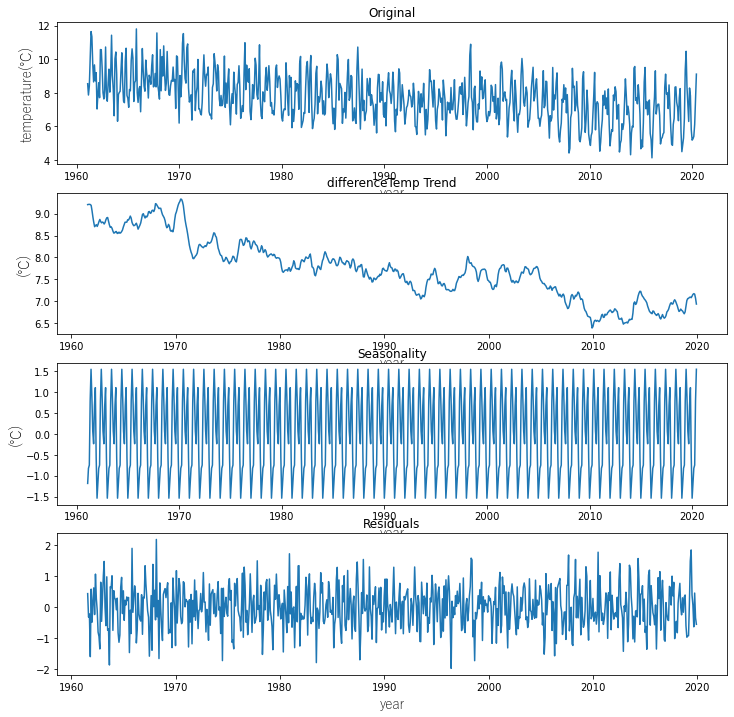

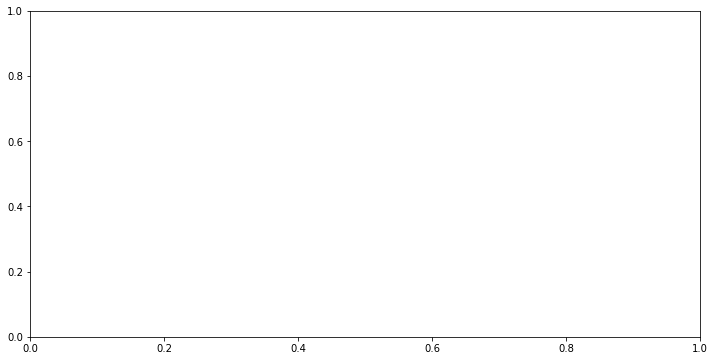

In [8]:
original = monthTempMean #オリジナルのデータ
trend = res.trend #
seasonal = res.seasonal
residual = res.resid
fig = plt.figure(figsize=(12, 12))
fig2 = plt.figure(figsize=(12, 6))
axs1 = fig.add_subplot(411)
axs2 = fig.add_subplot(412)
axs3 = fig.add_subplot(413)
axs4 = fig.add_subplot(414)
axs1.set_title("Original")
axs1.set_xlabel("year", fontproperties=fp)
axs1.set_ylabel("temperature(℃)", fontproperties=fp, rotation="90")
axs1.plot(original)

axs2.set_title("differenceTemp Trend")
axs2.set_xlabel("year", fontproperties=fp)
axs2.set_ylabel("(℃)", fontproperties=fp, rotation="90")
axs2.plot(trend)

axs3.set_title("Seasonality")
axs3.set_xlabel("year", fontproperties=fp)
axs3.set_ylabel("(℃)", fontproperties=fp, rotation="90")
axs3.plot(seasonal)

axs4.set_title("Residuals")
axs4.set_xlabel("year", fontproperties=fp)
#axs4.set_ylabel("(℃)", fontproperties=fp, rotation="90")
axs4.plot(residual)

axsB = fig2.add_subplot(111)
#axsB.boxplot(original)

plt.subplots_adjust(hspace=0.5, wspace=0.1)
plt.show()


In [9]:
print(trend.iloc[0])

print(f"seasonal={seasonal[0]}")
residual[0]

nan
seasonal=1.5523451110700655


nan

In [10]:
maxInMaxTemp = max(maxTempList)
print("day of maxTemp", date[maxTempList.index(maxInMaxTemp)])
print("maxInMaxTemp", maxInMaxTemp)
minInMaxTemp = min(maxTempList)
print("minInMaxTemp", minInMaxTemp)
print("day of minTemp", date[maxTempList.index(minInMaxTemp)])


day of maxTemp 1961-04-26
maxInMaxTemp 22.900000000000002
minInMaxTemp 0.0
day of minTemp 2020-03-11


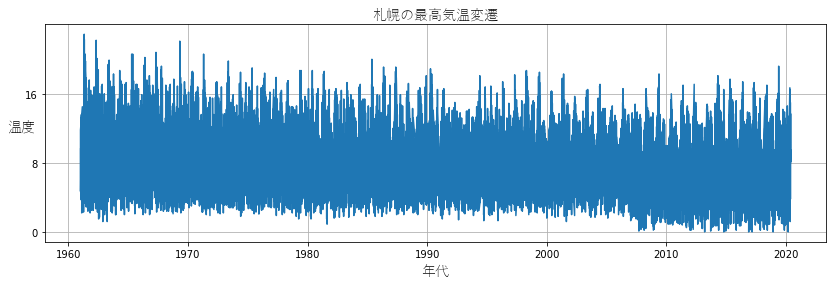

In [11]:
#fig = plt.figure(figsize=(13, 8), dpi=72)
#facecolor = 'skyblue', linewidth=10, edgecolor='green')
fig, axs = plt.subplots(1, 1, figsize=(14, 4))
axs.plot(date, maxTempList, label='sapporo')

yticks = list(range(int(minInMaxTemp), int(maxInMaxTemp), 8))
axs.set_yticks(yticks)
axs.set_title("札幌の最高気温変遷", fontproperties=fp, weight="bold")
axs.set_xlabel("年代", fontproperties=fp)
axs.set_ylabel("温度", fontproperties=fp, rotation="0")

axs.grid(True)
plt.show()

#plt.savefig("result.png")